In [288]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [289]:
df=pd.read_csv('data.csv', encoding='ISO-8859-1')
#dosya okundu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [290]:
print("Sütun Adları: \n", df.columns)
# Veri setinin sütun adlarını görüntüle


Sütun Adları: 
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [291]:
print("Veri setinin ilk 20 Satırı:\n ", df.head(20))
#veri setindeki ilk 20 satırı görtüntüle


Veri setinin ilk 20 Satırı:
     InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     2274

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [292]:
print("Genel İstatiksel Özet: \n", df.describe())
#Veri setinin genel istatistiksel özetini (describe) çıkarıldı

Genel İstatiksel Özet: 
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [293]:
print("Eksik verilerin sayısı:\n", df.isnull().sum())
## Eksik verilerin sayısını kontrol et


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Eksik verilerin sayısı:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [294]:
df['CustomerID'].ffill(inplace=True)
df['CustomerID'].bfill(inplace=True)
#cCustomerID değerleri çoğunlukla bir önceki veya bir sonraki değerle aynı olarak sıralanmış
#o nedenle eksik olan verileri bir önceki veya bir sonraki verilere görse dolurulmalı.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [295]:
df=df.dropna()
#eksik veriler silindi.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [296]:
df.isnull().sum()
# Eksik veriler sonrası durumu kontrol et


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [297]:
quantity_100=df[df['Quantity'] > 1000]
print("Yüksek Tutarda Alışveriş Yapan Müşteriler(ilk 20 sıralanmıştır): \n" , quantity_100.head(20))
# Miktarı 1000'den fazla olan alışverişleri seç


Yüksek Tutarda Alışveriş Yapan Müşteriler(ilk 20 sıralanmıştır): 
       InvoiceNo StockCode                         Description  Quantity  \
4850     536809     84950      ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945     536830     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
4946     536830     21915              RED  HARMONICA IN BOX       1400   
6365     536890    17084R               ASSORTED INCENSE PACK      1440   
16435    537659     22189             CREAM HEART CARD HOLDER      1008   
16436    537659     22188             BLACK HEART CARD HOLDER      1008   
19871    537899     22328  ROUND SNACK BOXES SET OF 4 FRUITS       1488   
19980    537981     22492             MINI PAINT SET VINTAGE       1394   
25920    538420     17096   ASSORTED LAQUERED INCENSE HOLDERS      1728   
32671    539101     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN      2400   
40060    539721     22616          PACK OF 12 LONDON TISSUES       1296   
52132    540689    85123A  WHITE 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


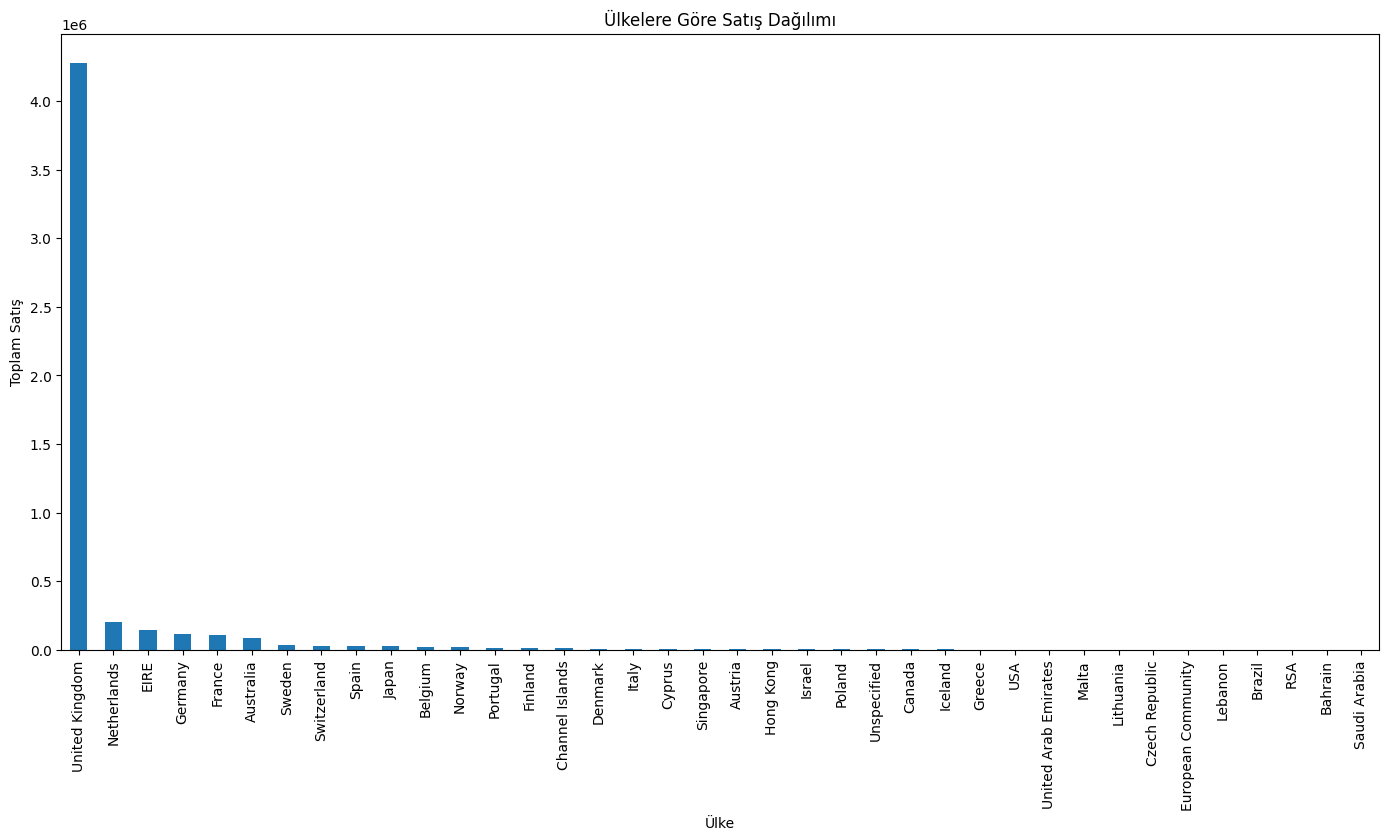

In [298]:
ulke_satis=df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(17,8))
ulke_satis.plot(kind='bar')
plt.title('Ülkelere Göre Satış Dağılımı')
plt.xlabel('Ülke')
plt.ylabel('Toplam Satış')
plt.show()
#artan sıralama
#ülkelere göre satış dağılımına bakıldı.
#Ülkelere göre toplam satışları gruplandır ve sıralı çubuk grafik oluştur


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


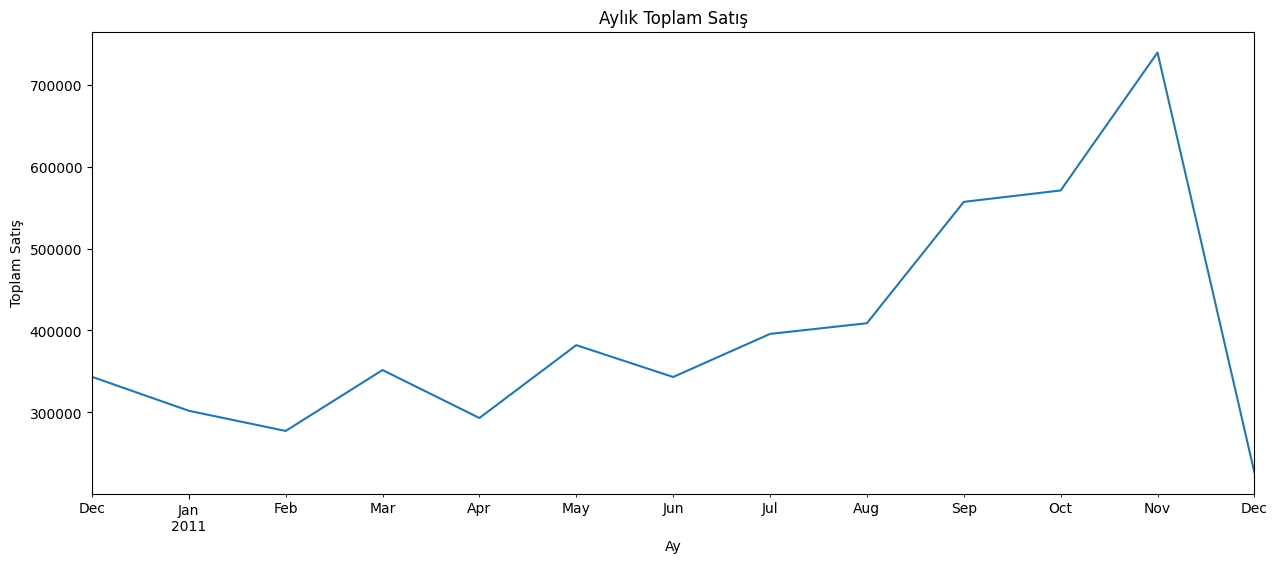

In [299]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
aylik_satis=df.set_index('InvoiceDate').resample('M')['Quantity'].sum()
plt.figure(figsize=(15,6))
aylik_satis.plot(kind='line')
plt.title('Aylık Toplam Satış')
plt.xlabel('Ay')
plt.ylabel('Toplam Satış')
plt.show()
#resample() metodu zaman serisi verilerini hangi periyotlarda tercih etecedğimi belirtmek için kullaılırç
#Satışların zaman içindeki trendini bir çizgi grafik ile gösterin (örneğin, aylık toplam satışlar).
# Tarih bilgilerini datetime formatına dönüştür ve aylık toplam satışları çizgi grafik ile göster


In [300]:
top_10=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_10_list=top_10.index.tolist()
#DataFrame'indeki indeksle
ulke_dagilim_list10=df[df['Description'].isin(top_10_list)].groupby(['Description', 'Country'])['Quantity'].sum().reset_index()
print(ulke_dagilim_list10)
#En çok satan 10 ürünü ve bu ürünlerin hangi ülkelerde daha fazla satıldığı analiz et.

                           Description          Country  Quantity
0        ASSORTED COLOUR BIRD ORNAMENT          Austria        24
1        ASSORTED COLOUR BIRD ORNAMENT          Belgium         8
2        ASSORTED COLOUR BIRD ORNAMENT           Canada         8
3        ASSORTED COLOUR BIRD ORNAMENT  Channel Islands         8
4        ASSORTED COLOUR BIRD ORNAMENT           Cyprus        48
..                                 ...              ...       ...
161  WORLD WAR 2 GLIDERS ASSTD DESIGNS            Spain       288
162  WORLD WAR 2 GLIDERS ASSTD DESIGNS           Sweden      2304
163  WORLD WAR 2 GLIDERS ASSTD DESIGNS      Switzerland       144
164  WORLD WAR 2 GLIDERS ASSTD DESIGNS   United Kingdom     48326
165  WORLD WAR 2 GLIDERS ASSTD DESIGNS      Unspecified        96

[166 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


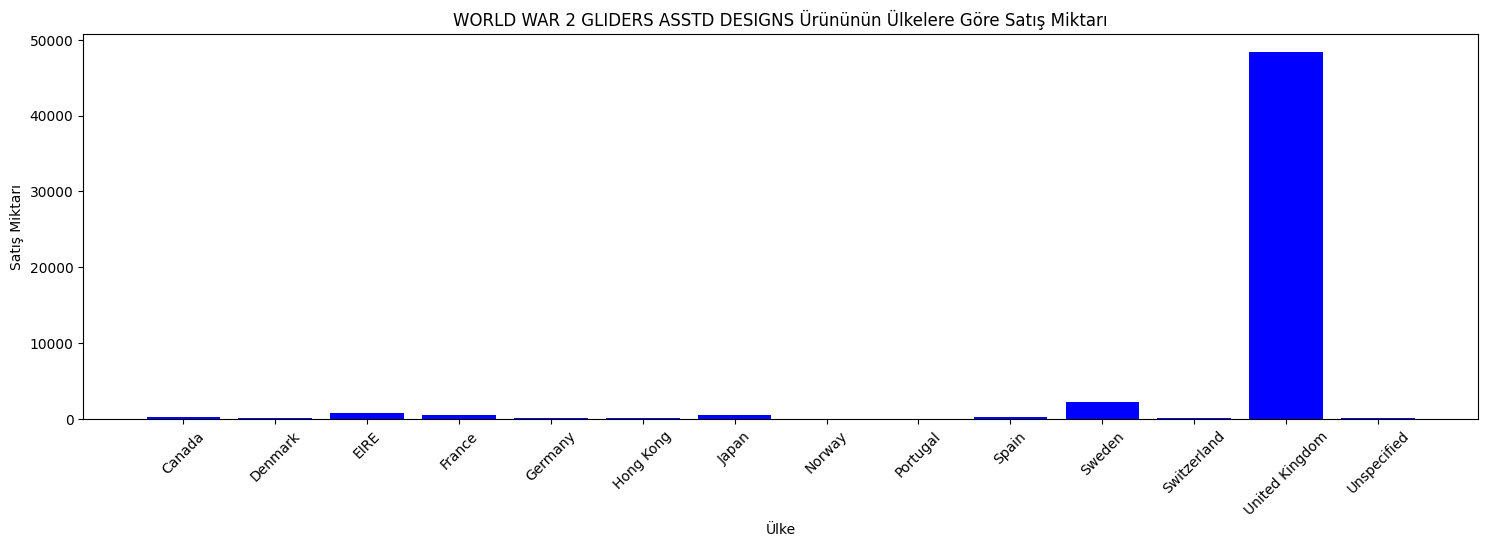

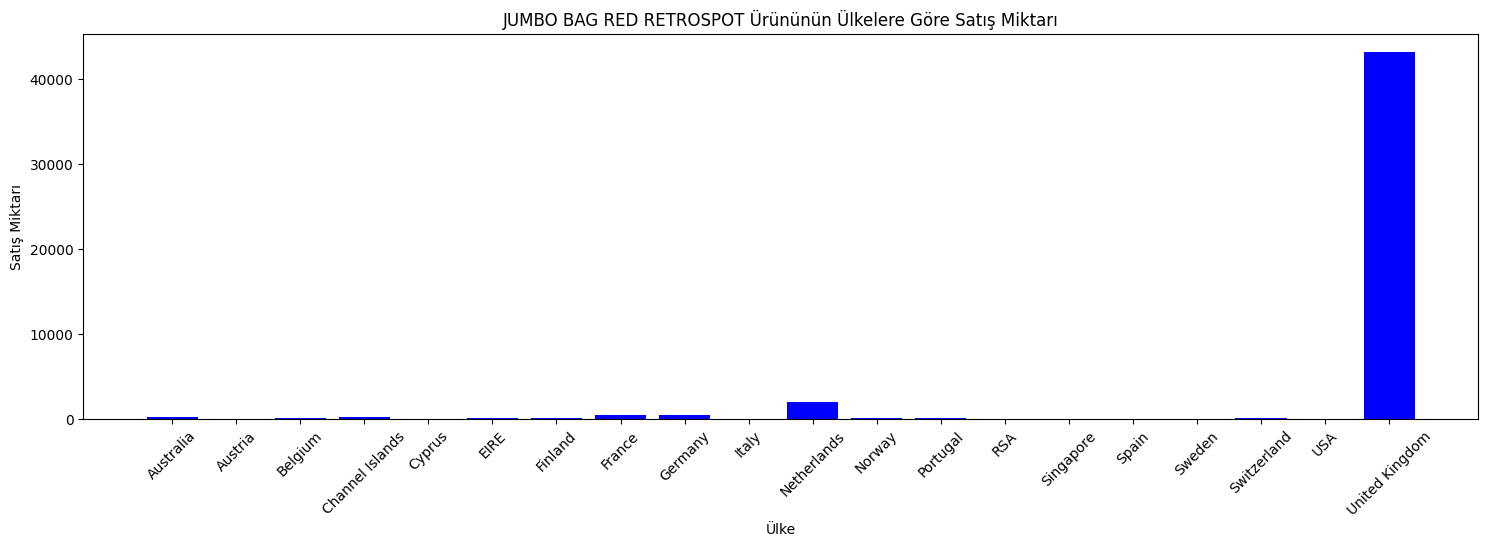

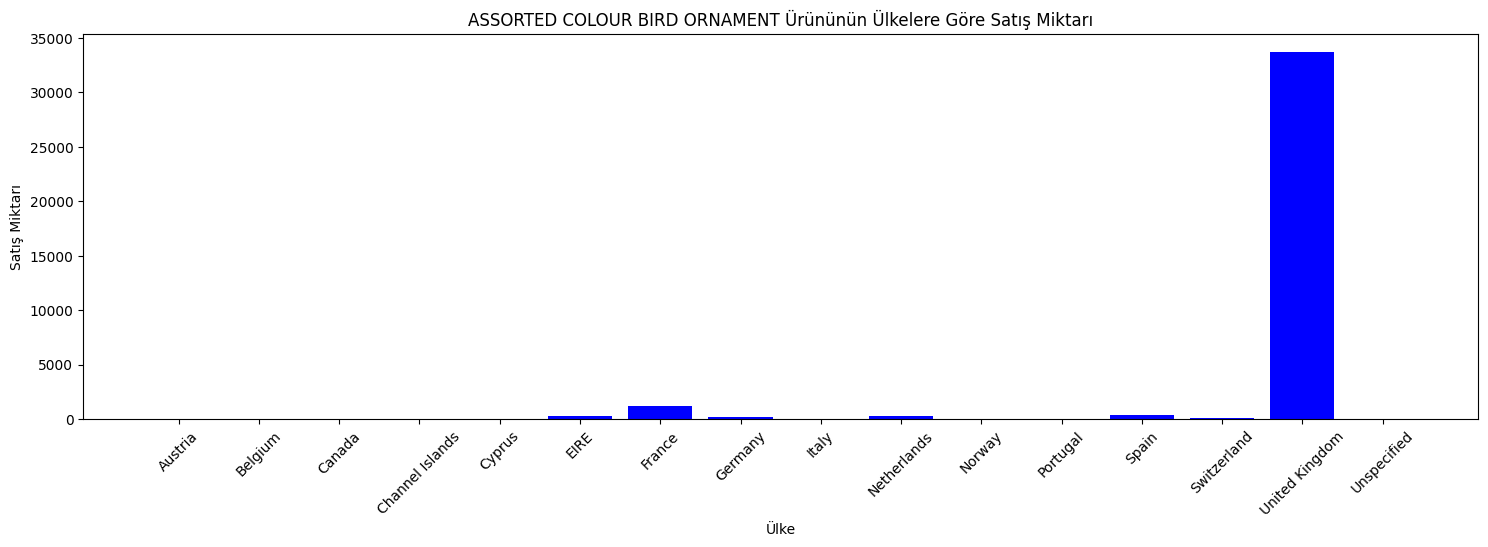

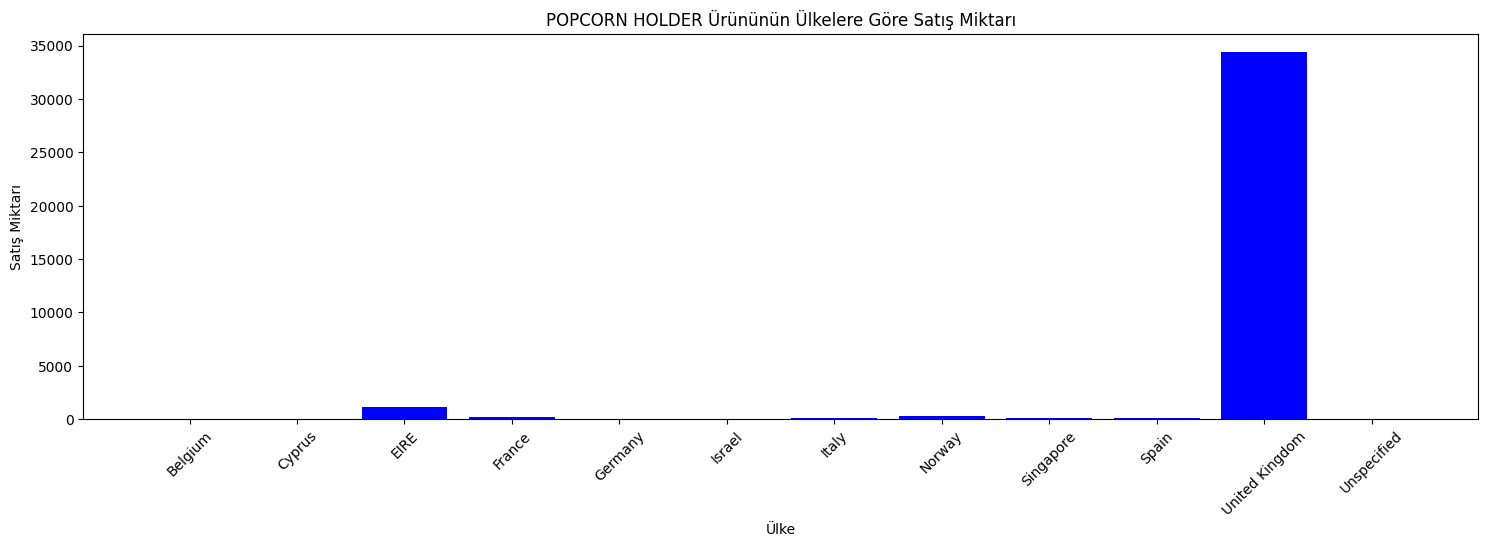

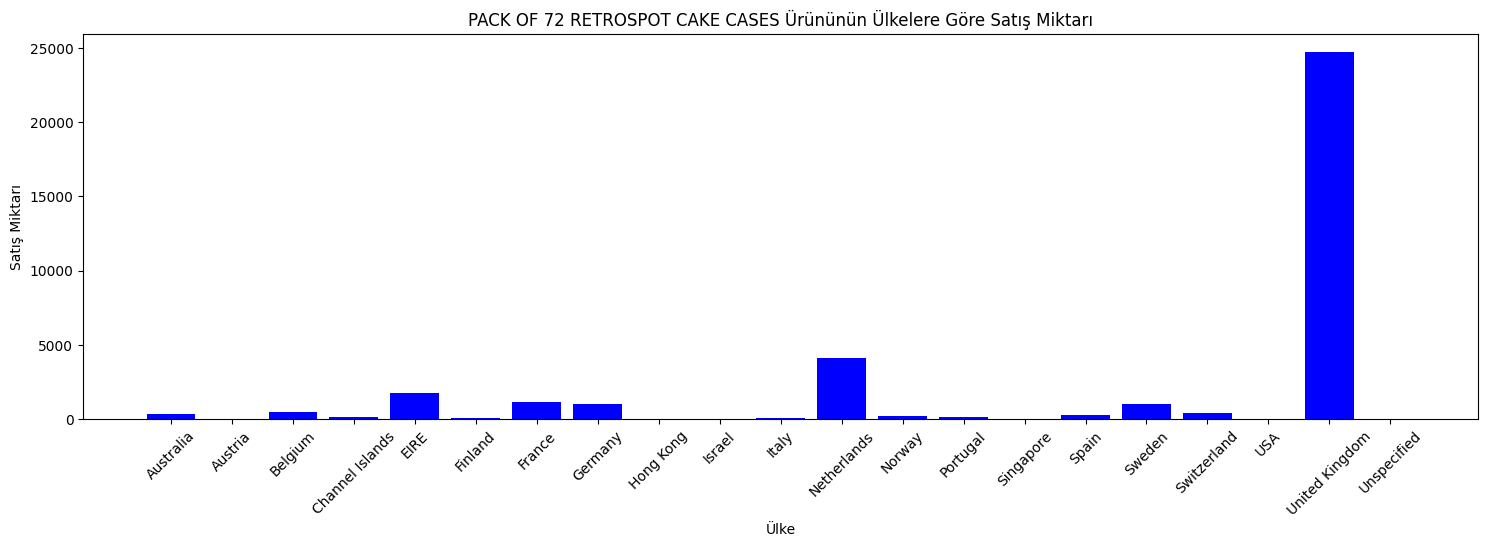

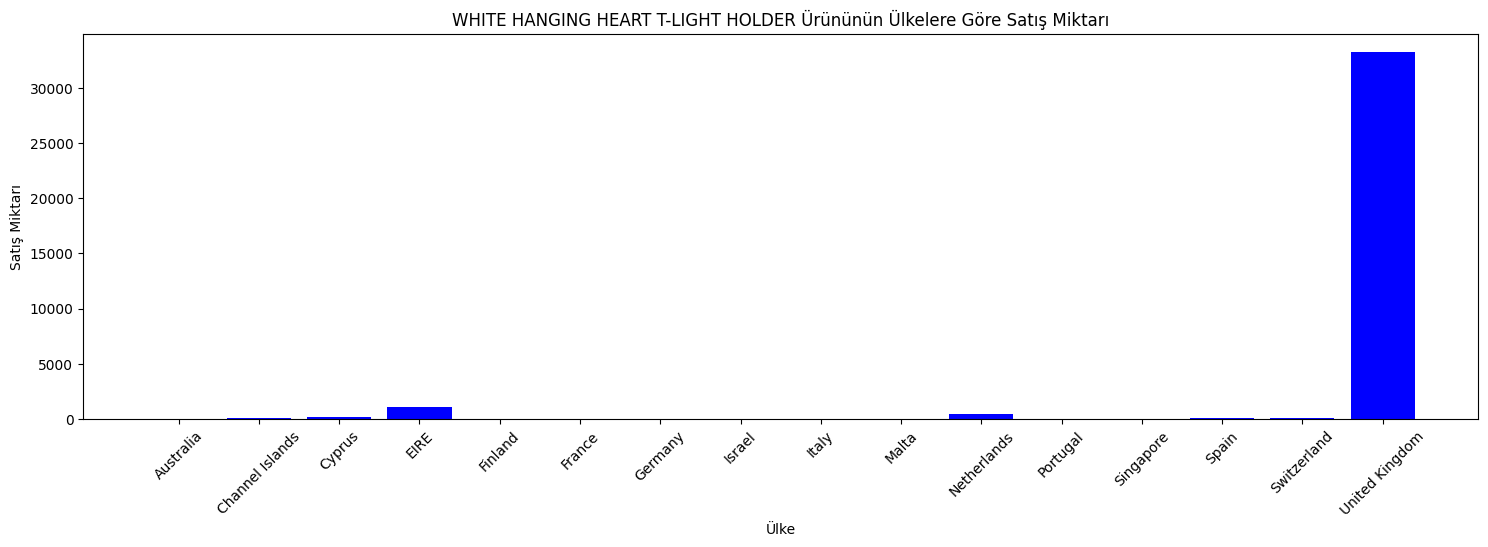

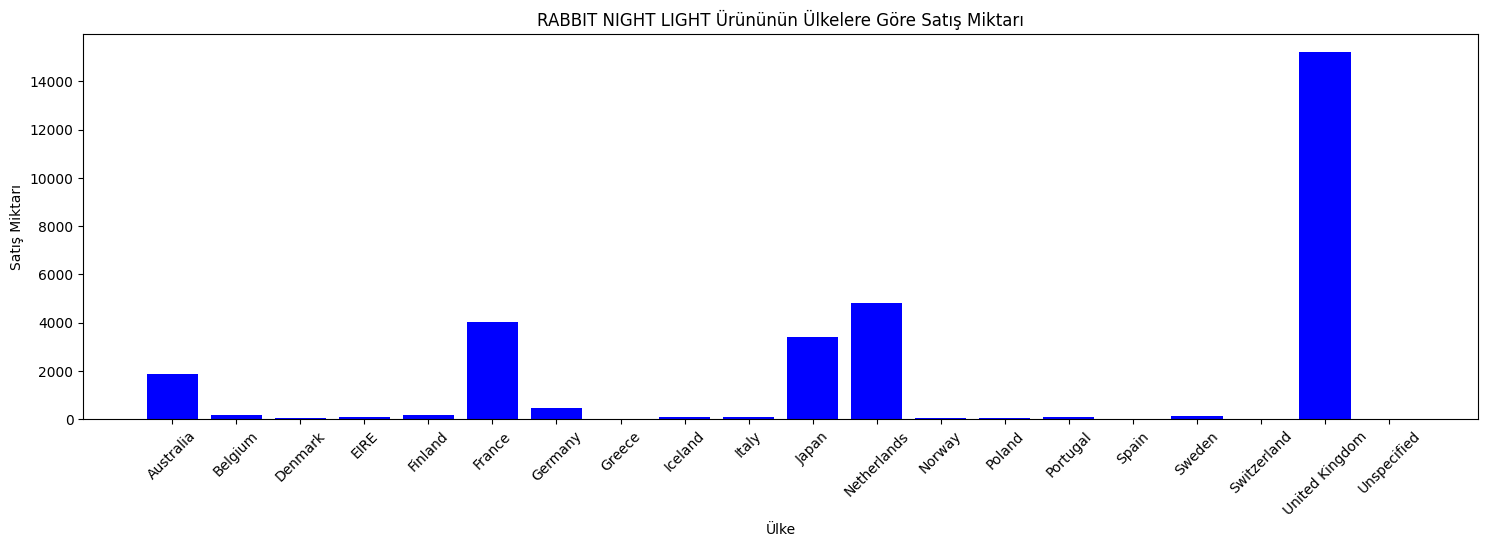

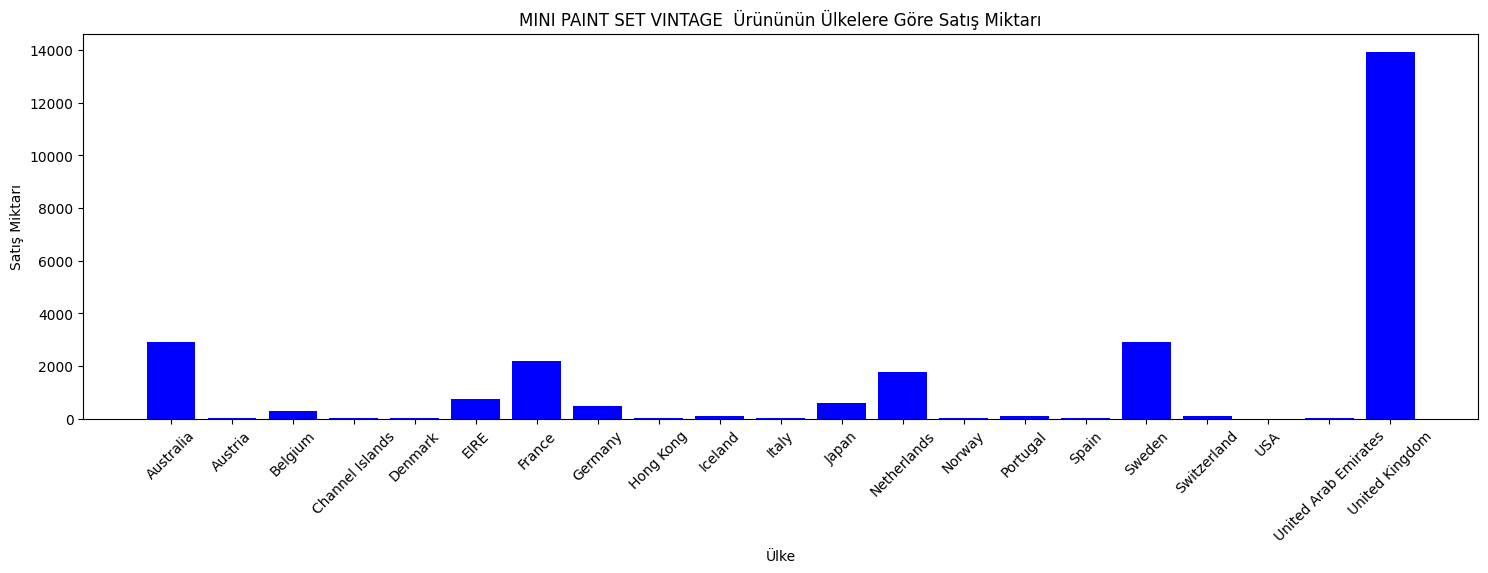

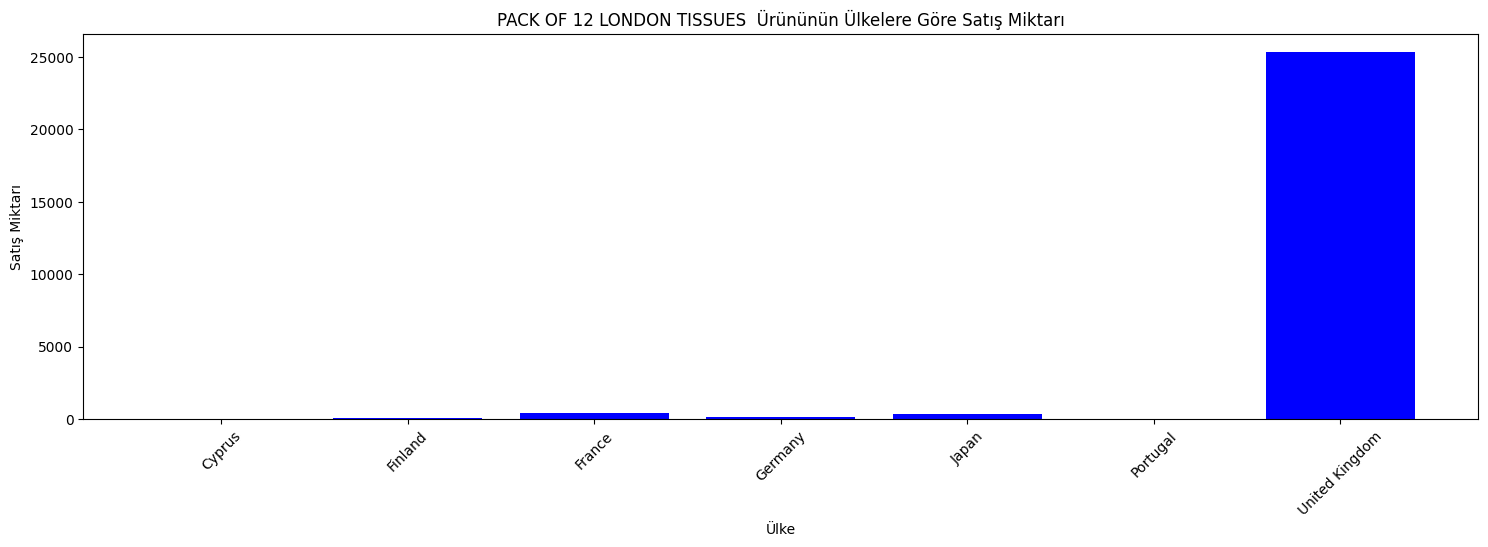

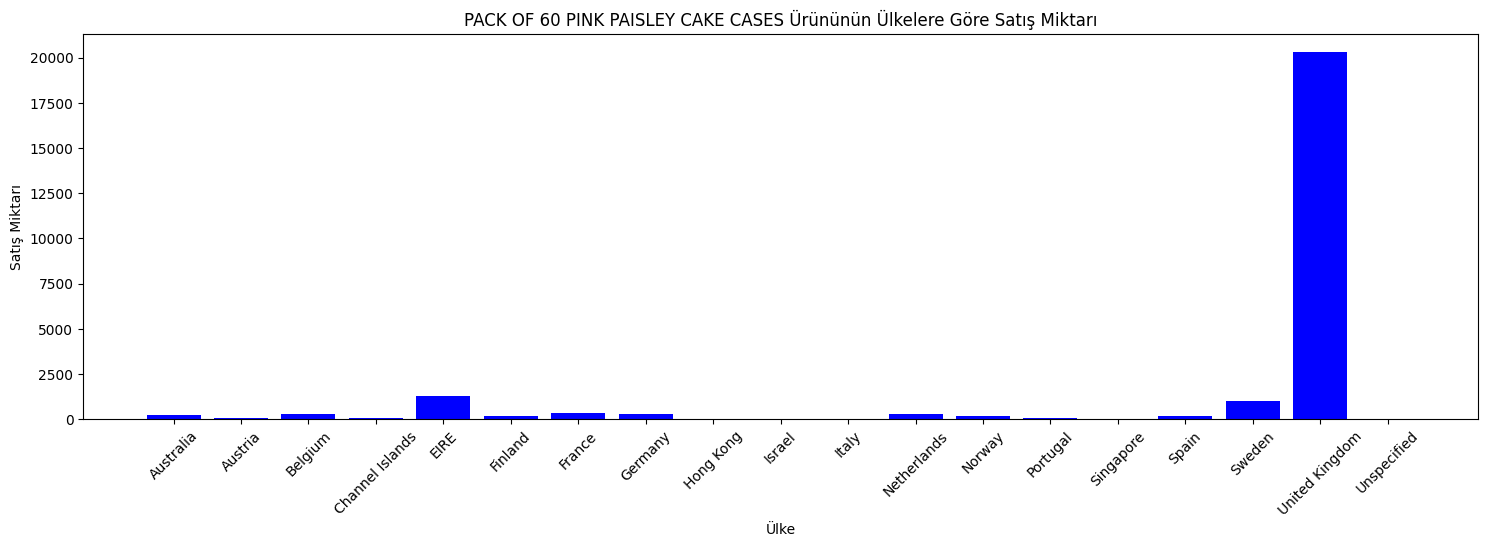

In [301]:
# Her bir ürün için ülkelere göre satış miktarını çubuk grafik ile göster

for product in top_10_list:
    product_data = ulke_dagilim_list10[ulke_dagilim_list10['Description'] == product]

    plt.figure(figsize=(18, 5))
    plt.bar(product_data['Country'], product_data['Quantity'], color='blue')
    plt.title(f"{product} Ürününün Ülkelere Göre Satış Miktarı")
    plt.xlabel('Ülke')
    plt.ylabel('Satış Miktarı')
    plt.xticks(rotation=45)
    plt.show()

In [302]:
# Burada `Quantity` tahmin edilecek hedef değişkendir
X = df[['UnitPrice', 'CustomerID']]  # Özellikler
y = df['Quantity']  # Hedef değişken

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [303]:
X = X[X['UnitPrice'] > 0]
# Negatif fiyatları ve eksik verileri çıkar
X = X.dropna()
y = y[X.index]  # X'teki eksik verilerden dolayı y'yi aynı indekslerle yeniden düzenleyin

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [304]:
# Verileri eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [305]:
# Özellikleri ölçeklendirildi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [306]:
# Regresyon modelini oluşturuldu.
model = RandomForestRegressor(n_estimators=150, random_state=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [307]:
# RandomForestRegressor modelini oluştur ve çapraz doğrulama ile değerlendir
cv = KFold(n_splits=5, random_state=400, shuffle=True)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [308]:
# Cross-validation MSE skorlarının ortalamasını ve standart sapması alındı.
cv_mse_mean = -cv_scores.mean()  # Negatif MSE'yi pozitif MSE'ye çevir
cv_mse_std = cv_scores.std()

# Cross-validation sonuçlarını yazdırdık
print(f"Cross-Validation MSE (mean): {cv_mse_mean}")
print(f"Cross-Validation MSE (std): {cv_mse_std}")


Cross-Validation MSE (mean): 174551.39304023836
Cross-Validation MSE (std): 159499.67998168638


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [309]:
# Modeli eğit ve test verileri üzerinde tahmin yap
model.fit(X_train, y_train)  # Ölçeklenmiş veriye gerek yok
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [310]:
# Performans metriklerini hesapla
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest): {mae}")
print(f"R² Score (Random Forest): {r2}")



Mean Absolute Error (Random Forest): 6.169023233921978
R² Score (Random Forest): 0.21429952624689375


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
